In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.oauth2 import service_account
from googleapiclient.discovery import build

# Import sklearn modules
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

# Switch off future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Link to the Google Sheet
link = 'https://docs.google.com/spreadsheets/d/1luO3H2QHzxrwnus9gsC8U3GMPLwwbG4py08Rv5IY1hs/edit?usp=sharing'

# Updated variables
spreadsheet_id = '1luO3H2QHzxrwnus9gsC8U3GMPLwwbG4py08Rv5IY1hs'
json_key_file = '/Users/timursalakhetdinov/Applied Statistical Analysis/Google_json/banded-anvil-309310-3642b97f7801.json'
sheet_name = 'Tabellenblatt1'  # Replace with the actual sheet name

# Authenticate using OAuth 2.0 JSON file
creds = service_account.Credentials.from_service_account_file(
    json_key_file,
    scopes=["https://www.googleapis.com/auth/spreadsheets.readonly"]
)
service = build('sheets', 'v4', credentials=creds)

# Fetch data from the specified sheet
result = service.spreadsheets().values().get(spreadsheetId=spreadsheet_id, range=sheet_name).execute()
values = result.get('values', [])

if values:
    # Convert to DataFrame
    df = pd.DataFrame(values[1:], columns=values[0])  # Assuming the first row is the header

    # Display the DataFrame
    display(df.head())
else:
    print("No data found in the sheet.")

,Name of the cookie,Nickname of the evaluator (anonymous),vegan (yes/no),no of Ingredients,"Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)","Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)","Crumble Factor (1, not crumble 10 tooooo much crumble)","Stickiness (0 no, 1 yes)","Appereance (1, is this a cookie? - 10 this cookie is art)","Contains chocolate (0 no, 1 yes)",...,color,"moisture (1=dry, 10=moist)",salty,nutty,"spiced (w/ Cinnamon, cloves, ginger etc, yes or no)",Overall Score (1 to 10),coconut,Aroma,"Allergensm (flour, eggs, nuts etc., yes or no)",burnt
0,Jacobsen (black),Keks,,,3,6,5,0,9,1,...,Brown and green,4,,yes,No,7,None,None,None,None
1,X-MAS,Dr Cookie,yes,8,7,6,,0,8,1,...,brown,4,no,no,no,,no,no,yes,0
2,Jacobsen (black),CookieMonster,,,4,5,8,0,9,1,...,black & white,3,no,yes,no,9,no,no,no,0
3,I've tried my best,cookie regressor,yes,,5,2,,0,8,0,...,,8,no,no,no,9,yes,no,no,0
4,Chatgpt chocolate cookie,cookie_master,yes,7,7,2,4,0,7,1,...,brown,8,no,no,no,7,no,normal,no,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 22 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Name of the cookie                                                       66 non-null     object
 1   Nickname of the evaluator (anonymous)                                    66 non-null     object
 2   vegan (yes/no)                                                           66 non-null     object
 3   no of Ingredients                                                        66 non-null     object
 4   Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)      66 non-null     object
 5   Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)  66 non-null     object
 6   Crumble Factor (1, not crumble 10 tooooo much crumble)                   66 non-null

In [4]:
df.columns

Index(['Name of the cookie', 'Nickname of the evaluator (anonymous)',
       'vegan (yes/no)', 'no of Ingredients',
       'Sweetness Factor (1, too sweet, 5 just perfect,10 not sweet enough)',
       'Crunch Factor (1 too little crunch - 10 too much crunch, 5just perfect)',
       'Crumble Factor (1, not crumble 10 tooooo much crumble)',
       'Stickiness (0 no, 1 yes)',
       'Appereance (1, is this a cookie? - 10 this cookie is art)',
       'Contains chocolate (0 no, 1 yes)',
       'Creativity(1, plain - I have never eaten such a cookie 10)', 'shape',
       'color', 'moisture (1=dry, 10=moist)', 'salty', 'nutty',
       'spiced (w/ Cinnamon, cloves, ginger etc, yes or no)',
       'Overall Score (1 to 10)', 'coconut', 'Aroma',
       'Allergensm (flour, eggs, nuts etc., yes or no)', 'burnt'],
      dtype='object')

In [5]:
# Clean column names by removing everything inside parentheses and the parentheses themselves
df.columns = (
    df.columns
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove text inside parentheses, including the parentheses
    .str.strip()  # Remove leading/trailing whitespace
    .str.replace(" ", "_")  # Replace spaces with underscores
    .str.lower()  # Convert to lowercase
)

# Display cleaned column names
print(df.columns)

Index(['name_of_the_cookie', 'nickname_of_the_evaluator', 'vegan',
       'no_of_ingredients', 'sweetness_factor', 'crunch_factor',
       'crumble_factor', 'stickiness', 'appereance', 'contains_chocolate',
       'creativity', 'shape', 'color', 'moisture', 'salty', 'nutty', 'spiced',
       'overall_score', 'coconut', 'aroma', 'allergensm', 'burnt'],
      dtype='object')


In [ ]:
# Drop the 'nickname_of_the_evaluator' column
df = df.drop(columns=['nickname_of_the_evaluator'])

In [11]:
# Lowercase all string values in the DataFrame
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

# Convert 'yes'/'no' values to 1/0 in all applicable columns
df = df.replace({'yes': 1, 'no': 0})

# Convert 'normal' values to 1 in the 'shape' column
df = df.replace({'normal': 1})

# Clean the 'shape' and 'color' columns
df['shape'] = df['shape'].replace('cricle', 'circle')
df['shape'] = df['shape'].replace('', 'nan')
df['color'] = df['color'].replace('whtile', 'white')
df['color'] = df['color'].replace('', 'nan')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'color' column
df['color'] = label_encoder.fit_transform(df['color'])
df['shape'] = label_encoder.fit_transform(df['shape'])

# Verify the changes
df.head()


,name_of_the_cookie,vegan,no_of_ingredients,sweetness_factor,crunch_factor,crumble_factor,stickiness,appereance,contains_chocolate,creativity,...,color,moisture,salty,nutty,spiced,overall_score,coconut,aroma,allergensm,burnt
0,jacobsen (black),<NA>,<NA>,3,6,5,0,9,1,6,...,3,4,<NA>,1,0,7,<NA>,<NA>,<NA>,<NA>
1,x-mas,1,8,7,6,<NA>,0,8,1,5,...,2,4,0,0,0,<NA>,0,0,1,0
2,jacobsen (black),<NA>,<NA>,4,5,8,0,9,1,5,...,1,3,0,1,0,9,0,0,0,0
3,i've tried my best,1,<NA>,5,2,<NA>,0,8,0,<NA>,...,7,8,0,0,0,9,1,0,0,0
4,chatgpt chocolate cookie,1,7,7,2,4,0,7,1,5,...,2,8,0,0,0,7,0,1,0,0


In [14]:
# Convert columns with numbers to float first to handle NaNs
numeric_columns = df.select_dtypes(include=['object']).columns

for col in numeric_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass

# Fill NaNs with the mean of the column and convert to int
df = df.apply(lambda x: x.fillna(x.mean()).astype(int) if x.dtype.kind in 'biufc' else x)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name_of_the_cookie  66 non-null     object
 1   vegan               66 non-null     int64 
 2   no_of_ingredients   66 non-null     int64 
 3   sweetness_factor    66 non-null     int64 
 4   crunch_factor       66 non-null     int64 
 5   crumble_factor      66 non-null     int64 
 6   stickiness          66 non-null     int64 
 7   appereance          66 non-null     int64 
 8   contains_chocolate  66 non-null     int64 
 9   creativity          66 non-null     int64 
 10  shape               66 non-null     int64 
 11  color               66 non-null     int64 
 12  moisture            66 non-null     int64 
 13  salty               66 non-null     int64 
 14  nutty               66 non-null     int64 
 15  spiced              66 non-null     int64 
 16  overall_score       66 non-n

In [15]:
df.head()

,name_of_the_cookie,vegan,no_of_ingredients,sweetness_factor,crunch_factor,crumble_factor,stickiness,appereance,contains_chocolate,creativity,...,color,moisture,salty,nutty,spiced,overall_score,coconut,aroma,allergensm,burnt
0,jacobsen (black),0,7,3,6,5,0,9,1,6,...,3,4,0,1,0,7,0,0,0,0
1,x-mas,1,8,7,6,5,0,8,1,5,...,2,4,0,0,0,7,0,0,1,0
2,jacobsen (black),0,7,4,5,8,0,9,1,5,...,1,3,0,1,0,9,0,0,0,0
3,i've tried my best,1,7,5,2,5,0,8,0,5,...,7,8,0,0,0,9,1,0,0,0
4,chatgpt chocolate cookie,1,7,7,2,4,0,7,1,5,...,2,8,0,0,0,7,0,1,0,0


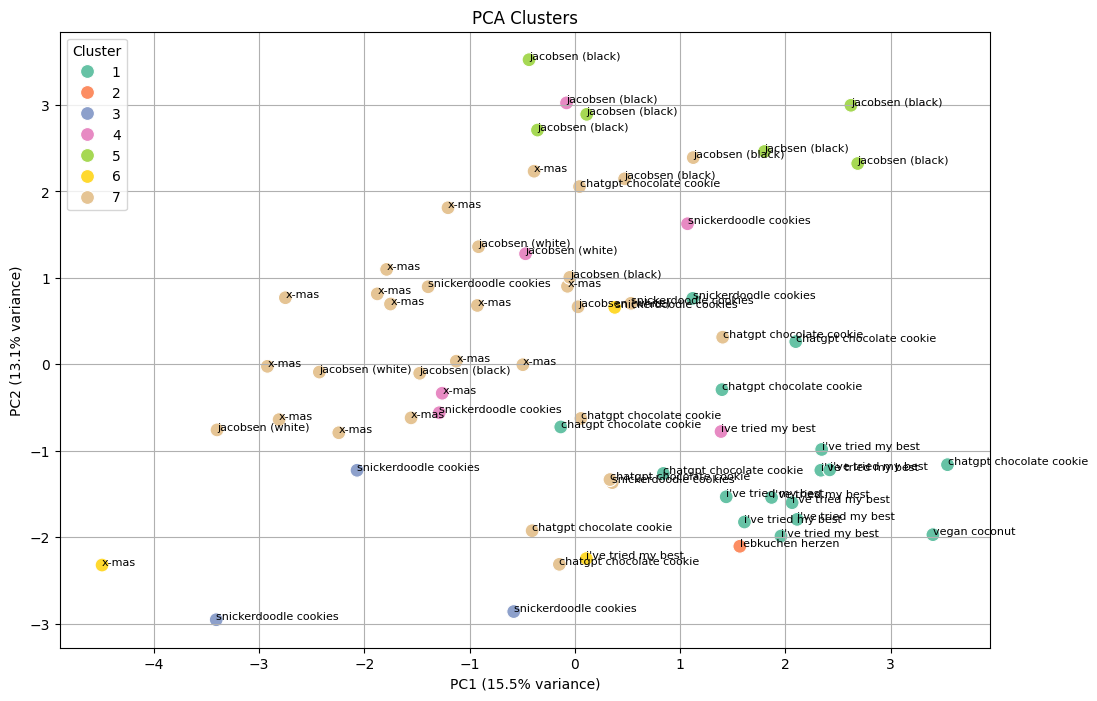

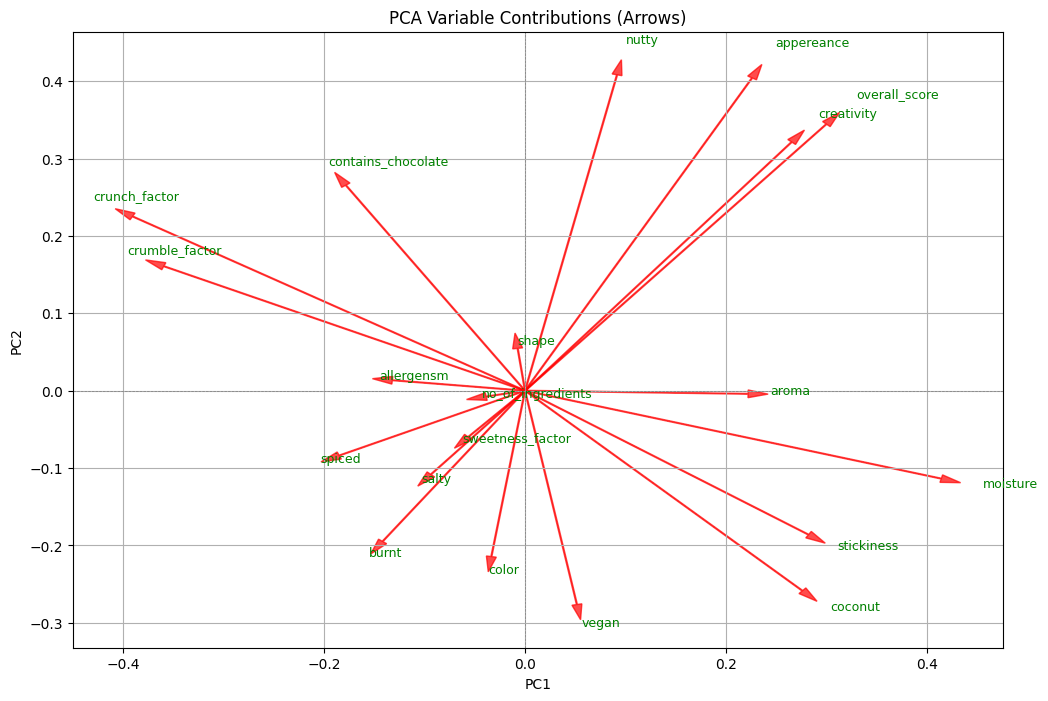

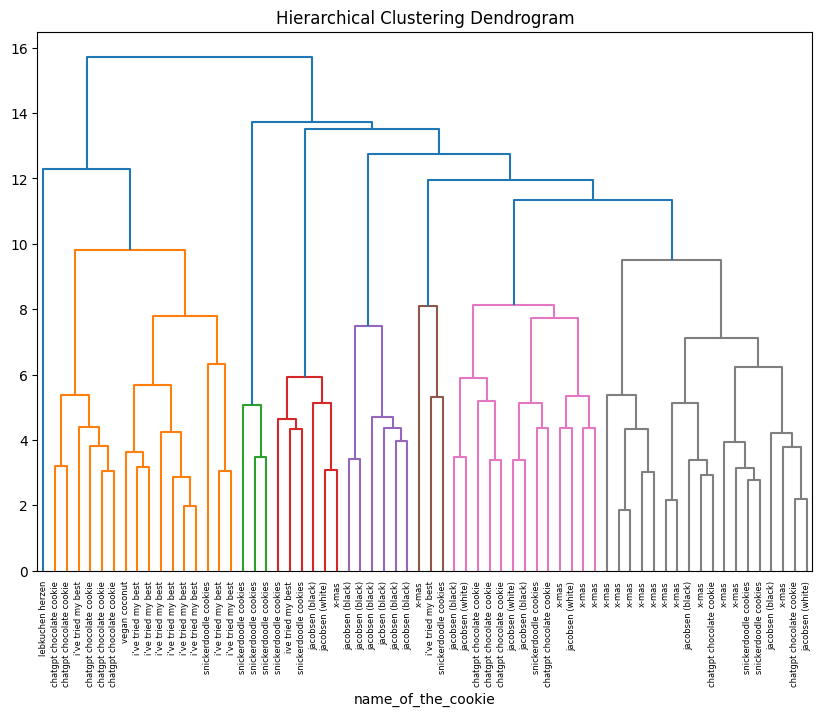

In [27]:
# Data preprocessing: standardize the data
features = df.columns[1:]  # Exclude the first column if it's non-numeric (e.g., cookie names)
data = df[features].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['name_of_the_cookie'] = df.iloc[:, 0]  # Add back the first column as cookie names
explained_variance = pca.explained_variance_ratio_

# Hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')
cluster_labels = fcluster(linkage_matrix, t=7, criterion='maxclust')  # Adjust 't' to set number of clusters

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Plot 1: PCA Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', s=100)

# Add text labels for each cookie
for i in range(len(pca_df)):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['name_of_the_cookie'][i], fontsize=8)

plt.title('PCA Clusters')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
plt.grid()
plt.show()

# Plot 2: PCA Arrows (Variable Contributions)
plt.figure(figsize=(12, 8))

# Add origin
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)

# Plot variable loadings as arrows
loadings = pca.components_.T  # No scaling applied here
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.7, 
              head_width=0.01, head_length=0.02, linewidth=1)  # Reduced arrowhead size
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature, color='g', fontsize=9)

plt.title('PCA Variable Contributions (Arrows)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.iloc[:, 0].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('name_of_the_cookie')
plt.show()

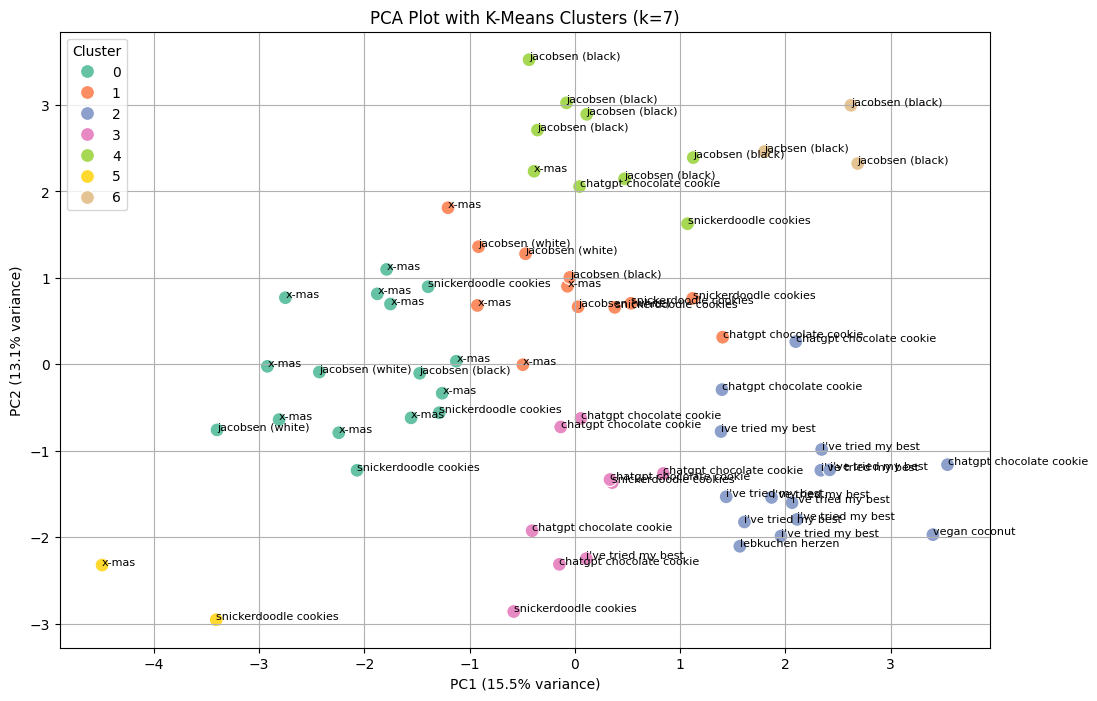

Cluster Centroids (in PCA space):
[[-2.00804376 -0.05203861]
 [-0.0544779   0.84526697]
 [ 2.10399212 -1.3172334 ]
 [ 0.04825485 -1.62938045]
 [ 0.17475486  2.511892  ]
 [-3.94929268 -2.63895304]
 [ 2.3713504   2.59440579]]


In [29]:
# Define the number of clusters (e.g., 7)
n_clusters = 7

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)  # Use PCA-transformed data

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_labels

# Plot PCA with K-Means clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', s=100)

# Add text labels for each cookie
for i in range(len(pca_df)):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['name_of_the_cookie'][i], fontsize=8)

plt.title(f'PCA Plot with K-Means Clusters (k={n_clusters})')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
plt.grid()
plt.show()

# Optional: Analyze K-Means cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids (in PCA space):")
print(centroids)